In [1]:
import numpy as np
import random 
import pandas as pd
import os
import time
import csv 
import warnings

# MATH and STATS:
import math

# PLOT:
import matplotlib.pyplot as plt
from plotnine import *
from plotnine.data import *
%matplotlib inline

# SKLEARN:
from sklearn import metrics # AMII and ARI
from sklearn import decomposition #PCA
from sklearn import discriminant_analysis

# EMBEDDINGs:
import umap

In [2]:
from import_subset_datasets import *

In [54]:
def lda_grid(em, mapper):
    AA, BB = np.meshgrid(np.linspace(em.A.min(), em.A.max(), 50),
                     np.linspace(em.B.min(), em.B.max(), 50))
    return AA, BB, mapper.inverse_transform(np.c_[AA.ravel(), BB.ravel()])

In [4]:
def plot_contours(gg, lda, AA, BB, grid):
    print(grid.shape)
    cmaps = ['Reds','Greens','Blues','Yellows']
    cnt = lda.predict_proba(grid)
    fig = gg.draw()
    ax = fig.get_axes()[0]
    for i in range(cnt.shape[1]):
        ax.contour(AA, BB, cnt[:,i].reshape(AA.shape), cmap=cmaps[i])#, [0.5])

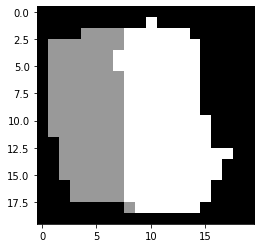

In [56]:
def plot_regions(gg, lda, AA, BB, grid):
    colors = ['r','g','b']
    preds = lda.predict(grid)
    cnt = lda.predict_proba(grid)
    u = np.unique(preds)
    fig = gg.draw()
    ax = fig.get_axes()[0]
    grid_size = 50
    #pix_size = 
    plt.imshow(preds.reshape(grid_size,-1), extent=[AA.min(),AA.max(),BB.max(),BB.min()],cmap='gray')
    return
    for i in range(grid_size):
        for j in range(grid_size):
            ax.scatter(AA[i,j], BB[i,j], marker='s', ms=2, c=colors[np.where(preds[i*grid_size+j] == u)[0][0]])

In [6]:
np.random.seed(44)
random.seed(44)

read_mnist_train = pd.read_csv(r"data\mnist_train.csv")
read_mnist_test = pd.read_csv(r"data\mnist_test.csv")

In [7]:
mnist_labels_raw = read_mnist_train.iloc[:, 0]

mnist_data = read_mnist_train.iloc[:, 1:]

selected_digits = [3, 8, 6]
selected_digits_2 = [1,4]

mnist_pca, mnist_labels, mnist_raw, ve, pca = import_subset(mnist_data, mnist_labels_raw, selected_digits,30, 800)
mnist_pca_2, mnist_labels_2, mnist_raw_2, ve2, pca2 = import_subset(mnist_data, mnist_labels_raw, selected_digits_2, 30, 800)

# Transform test data
mnist_test_labels_raw = read_mnist_test.iloc[:, 0]
mnist_test_data = read_mnist_test.iloc[:, 1]
mnist_test_pca, mnist_test_labels, mnist_test_raw,_,_2 = import_subset(mnist_test_data, mnist_test_labels_raw, selected_digits, 30, 50, pca=pca)

In [9]:
mapper = umap.UMAP(metric='euclidean')
embedding = mapper.fit_transform(mnist_pca)

label = pd.Series(mnist_labels)
em = pd.DataFrame(embedding, columns=['A','B']) 
em['label'] = label.astype(str)
gg = ggplot(aes(x='A', y='B', color='label'), data=em)+geom_point()+ scale_color_discrete(guide=False)+ labs(x = "", y = "") 
#gg.save("MNIST38_real.png",dpi =300)

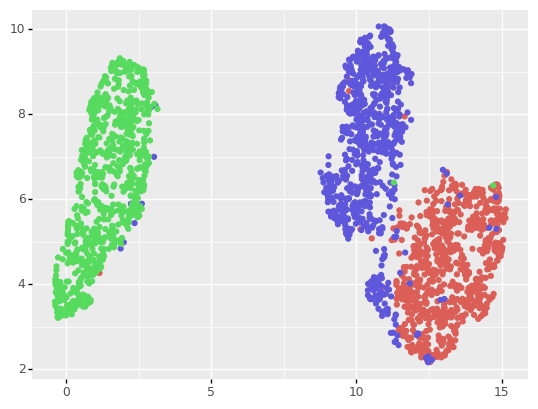

<ggplot: (113067482935)>

In [10]:
gg

In [11]:
nreps = 10

lda = discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(mnist_pca, label)

LinearDiscriminantAnalysis()

In [55]:
ret =  lda_grid(em, mapper)

(2500, 30)


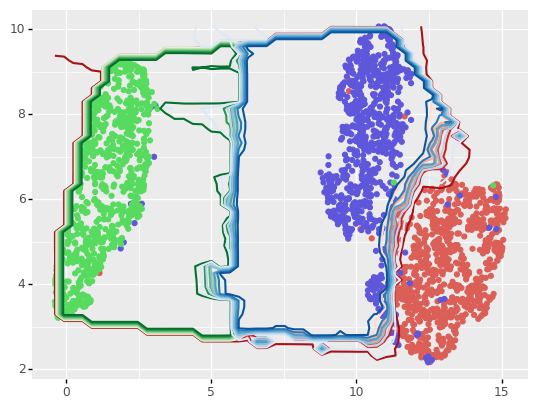

In [57]:
plot_contours(gg, lda, *ret)

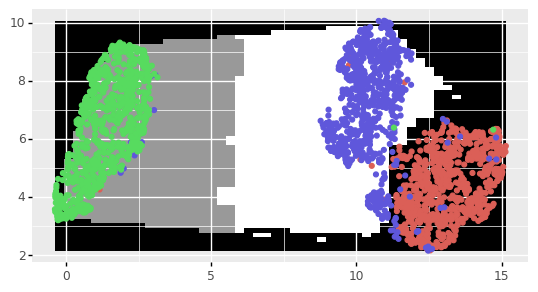

In [58]:
plot_regions(gg, lda, *ret)

In [12]:
mnist_pca.shape

(2400, 30)